In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('transaction_dataset.csv')

In [8]:
df.dtypes

Unnamed: 0                                                int64
Index                                                     int64
Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                            

In [14]:
#Standardizing names of all columns. Removing extra spaces and adding '_' to avoid naming errors
df.columns = df.columns.str.strip().str.replace(r'\b\s+\b', '-', regex=True)
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg-min-between-sent-tnx',
       'Avg-min-between-received-tnx',
       'Time-Diff-between-first-and-last (Mins)', 'Sent-tnx', 'Received-Tnx',
       'Number-of-Created-Contracts', 'Unique-Received-From-Addresses',
       'Unique-Sent-To-Addresses', 'min-value-received', 'max-value-received',
       'avg-val-received', 'min-val-sent', 'max-val-sent', 'avg-val-sent',
       'min-value-sent-to-contract', 'max-val-sent-to-contract',
       'avg-value-sent-to-contract',
       'total-transactions (including-tnx-to-create-contract',
       'total-Ether-sent', 'total-ether-received',
       'total-ether-sent-contracts', 'total-ether-balance', 'Total-ERC20-tnxs',
       'ERC20-total-Ether-received', 'ERC20-total-ether-sent',
       'ERC20-total-Ether-sent-contract', 'ERC20-uniq-sent-addr',
       'ERC20-uniq-rec-addr', 'ERC20-uniq-sent-addr.1',
       'ERC20-uniq-rec-contract-addr', 'ERC20-avg-time-between-sent-tnx',
       'ERC20-avg-time-be

In [21]:
df.duplicated().sum()

0

In [23]:
df = df.drop(columns=['Unnamed: 0', 'Index', 'Address'])

In [25]:
categories = df.select_dtypes(include='object').columns
categories

Index(['ERC20-most-sent-token-type', 'ERC20_most_rec_token_type'], dtype='object')

In [27]:
for i in df[categories].columns:
    print(f'The categorical column {i} has {df[i].nunique()} unique values and {df[i].isnull().sum()} missing values')

The categorical column ERC20-most-sent-token-type has 305 unique values and 841 missing values
The categorical column ERC20_most_rec_token_type has 467 unique values and 851 missing values


In [28]:
numerics = df.select_dtypes(include = 'number').columns

In [29]:
constant_cols = df[numerics].var()[df[numerics].var() == 0].index
constant_cols

Index(['ERC20-avg-time-between-sent-tnx', 'ERC20-avg-time-between-rec-tnx',
       'ERC20-avg-time-between-rec-2-tnx',
       'ERC20-avg-time-between-contract-tnx', 'ERC20-min-val-sent-contract',
       'ERC20-max-val-sent-contract', 'ERC20-avg-val-sent-contract'],
      dtype='object')

In [30]:
df.drop(constant_cols, axis = 1, inplace = True)

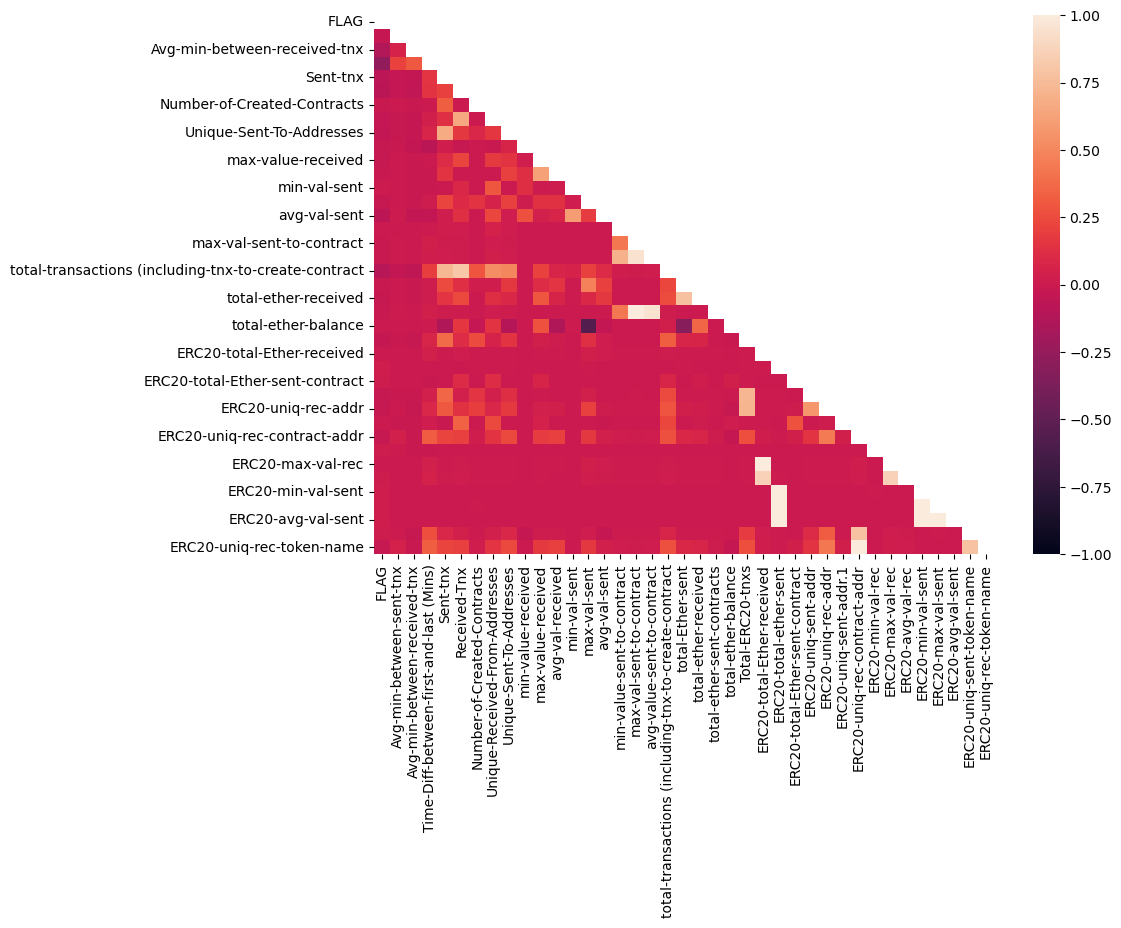

In [33]:
# checking the Coorelation matrix to see if we can drop more columns
plt.figure(figsize = (10,7))
numerics = df.select_dtypes(include = 'number').columns
corr = df[numerics].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=False, vmin=-1, vmax=1)
plt.show()


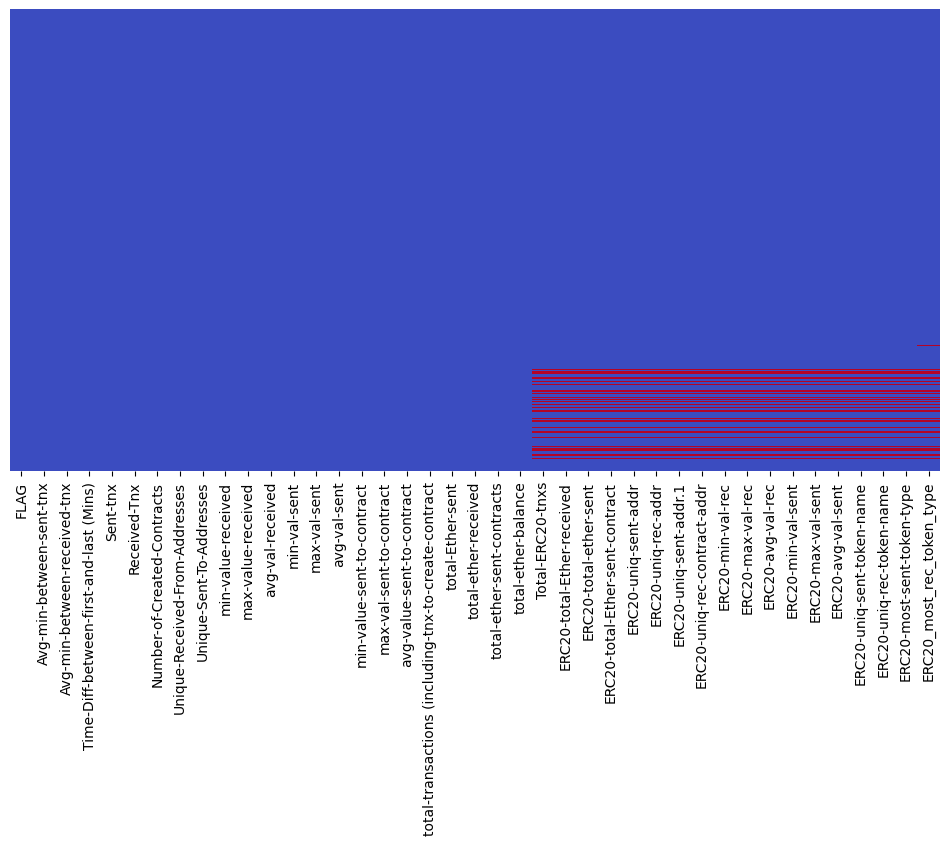

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.yticks([])
plt.show()

In [36]:
missing_rows_count = df.isnull().any(axis=1).sum()
missing_rows_count

860

In [38]:
missing_mask = df.isnull().any(axis=1)
print(df.loc[missing_mask, 'FLAG'].value_counts())
print(" ")
print(round(df.loc[missing_mask, 'FLAG'].value_counts(normalize=True), 2))

1    829
0     31
Name: FLAG, dtype: int64
 
1    0.96
0    0.04
Name: FLAG, dtype: float64


Separating data for supervised learning and unsupervised learning

In [39]:
print(df[~missing_mask].shape)
df_sub = df[~missing_mask]

(8981, 41)


In [40]:
df.to_csv('data_for_supervised_learning.csv', index=False)
df_sub.to_csv('data_for_unsupervised_learning.csv', index=False)